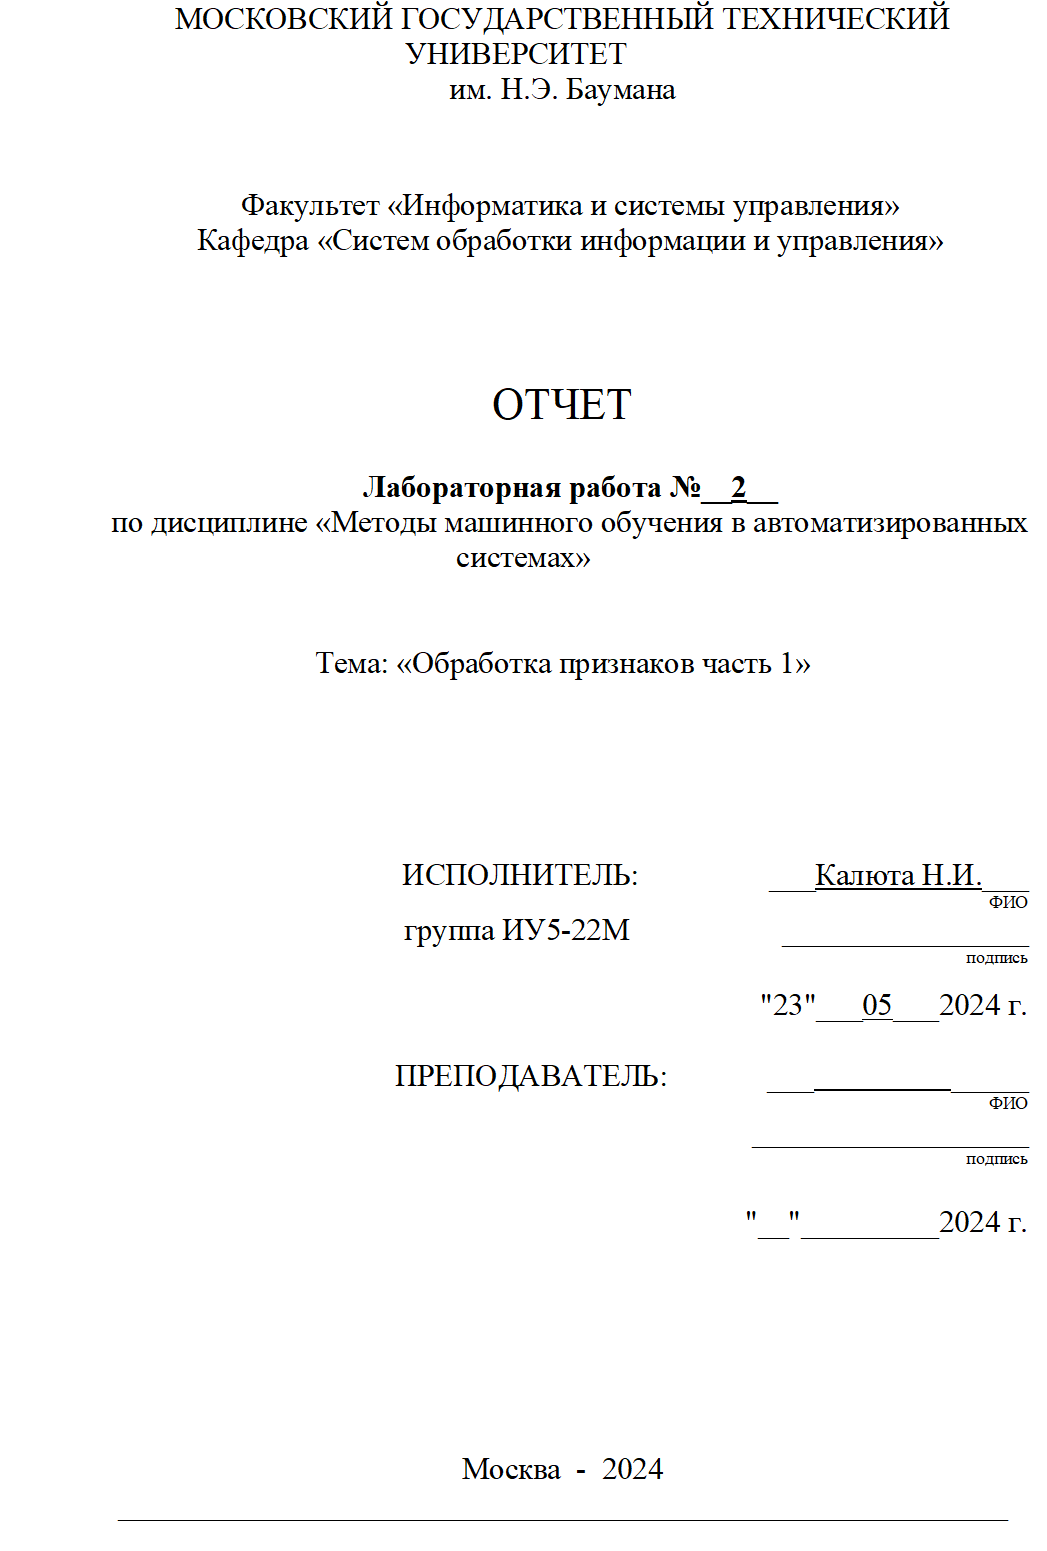

###**Цель:**
Изучение продвинутых способов предварительной обработки данных для дальнейшего формирования моделей.

###**Задание:**
<ol>
<li>Выбрать набор данных (датасет), содержащий категориальные и числовые признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.) Просьба не использовать датасет, на котором данная задача решалась в лекции.</li>

<li>Для выбранного датасета (датасетов) на основе материалов лекций решить следующие задачи:
  <ol>
  <li>устранение пропусков в данных;</li>
  <li>кодирование категориальных признаков;</li>
  <li>нормализация числовых признаков.</li>
  </ol>
</li>

<li>Сформировать отчет и разместить его в своем репозитории на github.</li>
</ol>

###**Текст программы и экранные формы**

#### Описание датасета
Для выполнения работы был выран набор данных "52,000 Animation Movie Details". Этот набор данных содержит подробную информацию о 54 000 анимационных фильмах, включая такие характеристики, как название, среднее число голосов, подсчет голосов, дата выхода, выручка, время выполнения и многое другое. Всего в датасете 23 столбца. Я привел таблицу с названиями столбцов и их описанием. Так же у столбцов с численными значениями и с категориальными значениями я сделала пометки.

In [4]:
import pandas as pd

data = [
    ["id","Уникальный идентификатор фильма.", ""],
    ["title", "Название фильма.", ""],
    ["vote_average", "Средняя оценка фильма.", "num"],
    ["vote_count", "Количество голосов.", "num"],
    ["status","Статус фильма (например, выпущен, в производстве и т.д.).", "cat"],
    ["release_date", "Дата выхода фильма.", ""],
    ["revenue","Доход, полученный от фильма.", "num"],
    ["runtime","Продолжительность фильма в минутах.", "num"],
    ["adult","Указывает, подходит ли фильм для взрослых.", "cat"],
    ["backdrop_path","URL-адрес фонового изображения для фильма.", ""],
    ["budget","Бюджет, выделенный на фильм.", "num"],
    ["homepage","URL-адрес официального веб-сайта фильма", ""],
    ["imdb_id","Идентификатор фильма в IMDB.", ""],
    ["original_language","Язык оригинала фильма.", "cat"],
    ["original_title","Оригинальное название фильма.", ""],
    ["overview","Краткое содержание или обзор фильма.", ""],
    ["popularity","Рейтинг популярности фильма.", "num"],
    ["poster_path","URL изображения постера фильма.", ""],
    ["tagline","Слоган, связанный с фильмом.", ""],
    ["genres","Список жанров, связанных с фильмом.", "[cat]"],
    ["production_companies","Список продюсерских компаний, задействованных в фильме.", "[cat]"],
    ["production_countries","Список стран, в которых был снят фильм.", "[cat]"],
    ["spoken_languages","Список языков, на которых говорят в фильме.", "[cat]"]
    ]

df = pd.DataFrame(data)
df


,0,1,2
0,id,Уникальный идентификатор фильма.,
1,title,Название фильма.,
2,vote_average,Средняя оценка фильма.,num
3,vote_count,Количество голосов.,num
4,status,"Статус фильма (например, выпущен, в производст...",cat
5,release_date,Дата выхода фильма.,
6,revenue,"Доход, полученный от фильма.",num
7,runtime,Продолжительность фильма в минутах.,num
8,adult,"Указывает, подходит ли фильм для взрослых.",cat
9,backdrop_path,URL-адрес фонового изображения для фильма.,


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/content/drive/MyDrive/Временные файлы/Animation_Movies.csv")
df

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages
0,150540,Inside Out,7.922,19463,Released,2015-06-09,857611174,95,False,/j29ekbcLpBvxnGk6LjdTc2EI5SA.jpg,...,en,Inside Out,"Growing up can be a bumpy road, and it's no ex...",107.292,/2H1TmgdfNtsKlU9jKdeNyYL5y8T.jpg,Meet the little voices inside your head.,"Animation, Family, Adventure, Drama, Comedy","Pixar, Walt Disney Pictures",United States of America,English
1,14160,Up,7.949,18857,Released,2009-05-28,735099082,96,False,/hGGC9gKo7CFE3fW07RA587e5kol.jpg,...,en,Up,Carl Fredricksen spent his entire life dreamin...,90.968,/vpbaStTMt8qqXaEgnOR2EE4DNJk.jpg,The greatest adventure is just getting back home.,"Animation, Comedy, Family, Adventure",Pixar,United States of America,English
2,12,Finding Nemo,7.824,18061,Released,2003-05-30,940335536,100,False,/h3uqFk7sZRJvLZDdLiFB9qwbL07.jpg,...,en,Finding Nemo,"Nemo, an adventurous young clownfish, is unexp...",55.456,/ggQ6o8X5984OCh3kZi2UIJQJY5y.jpg,There are 3.7 trillion fish in the ocean. They...,"Animation, Family",Pixar,United States of America,English
3,354912,Coco,8.222,17742,Released,2017-10-27,800526015,105,False,/askg3SMvhqEl4OL52YuvdtY40Yb.jpg,...,en,Coco,Despite his family’s baffling generations-old ...,166.578,/gGEsBPAijhVUFoiNpgZXqRVWJt2.jpg,The celebration of a lifetime,"Family, Animation, Fantasy, Music, Comedy, Adv...","Pixar, Walt Disney Pictures",United States of America,"English, Spanish"
4,10681,WALL·E,8.078,17446,Released,2008-06-22,521311860,98,False,/fK5ssgvtI43z19FoWigdlqgpLRE.jpg,...,en,WALL·E,What if mankind had to leave Earth and somebod...,58.517,/hbhFnRzzg6ZDmm8YAmxBnQpQIPh.jpg,After 700 years of doing what he was built for...,"Animation, Family, Science Fiction","Pixar, Walt Disney Pictures",United States of America,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51940,656677,Белозубка,0.000,0,Released,2018-12-20,0,0,False,NaN,...,ru,Белозубка,NaN,0.600,/r9rYEqBVJIHDUZZPyCkstkiM8Z2.jpg,NaN,Animation,NaN,Russia,NaN
51941,657149,Shimajiro to Ururu no Heroland,0.000,0,Released,2019-03-15,0,60,False,/jQMHu7B7LOY3R2PNJA4bBahEewN.jpg,...,ja,映画しまじろう しまじろうとうるるのヒーローランド,Hero Land is a world where you can meet the he...,2.531,/yGthNH49g4ezKLrn6cUNKygcbtz.jpg,NaN,"Family, Animation, Fantasy","Benesse, Sony Music Direct, TOHO, The Answer S...",Japan,"Japanese, English, Mandarin"
51942,656945,Robo Force: The Revenge of Nazgar,0.000,0,Released,1984-12-08,0,22,False,NaN,...,en,Robo Force: The Revenge of Nazgar,"TV Short for Robo Force, included in Challenge...",1.952,/2l6C7P7zFE5WaLdpyzayYfWdIbW.jpg,NaN,"Animation, Action, Science Fiction",NaN,NaN,English
51943,656893,Beginning Responsibility: A Lunchroom Goes Ban...,0.000,0,Released,1978-01-01,0,12,False,NaN,...,en,Beginning Responsibility: A Lunchroom Goes Ban...,The food in Plumcrest School Cafeteria has gon...,0.600,NaN,NaN,"Animation, Documentary, Family",Coronet Films,NaN,English


In [6]:
data_features = list(zip(
# признаки
[i for i in df.columns],
zip(
    # типы колонок
    [str(i) for i in df.dtypes],
    # проверим есть ли пропущенные значения
    [i for i in df.isnull().sum()]
)))
# Признаки с типом данных и количеством пропусков
data_features

[('id', ('int64', 0)),
 ('title', ('object', 1)),
 ('vote_average', ('float64', 0)),
 ('vote_count', ('int64', 0)),
 ('status', ('object', 0)),
 ('release_date', ('object', 2137)),
 ('revenue', ('int64', 0)),
 ('runtime', ('int64', 0)),
 ('adult', ('bool', 0)),
 ('backdrop_path', ('object', 36110)),
 ('budget', ('int64', 0)),
 ('homepage', ('object', 43692)),
 ('imdb_id', ('object', 22393)),
 ('original_language', ('object', 0)),
 ('original_title', ('object', 1)),
 ('overview', ('object', 6079)),
 ('popularity', ('float64', 0)),
 ('poster_path', ('object', 14011)),
 ('tagline', ('object', 47267)),
 ('genres', ('object', 0)),
 ('production_companies', ('object', 22547)),
 ('production_countries', ('object', 12245)),
 ('spoken_languages', ('object', 18127))]

In [7]:
df.shape

(51945, 23)

### Устранение пропусков

Для тех колонок, в которых процент пропущенных значений не более 20% удалим строки с пропусками.

In [64]:
# Колонки с пропусками
df_na = [c for c in df.columns if df[c].isnull().sum() > 0]
# Доля (процент) пропусков
[(c, df[c].isnull().mean()) for c in df_na]

[('title', 1.9251131003946483e-05),
 ('release_date', 0.04113966695543363),
 ('backdrop_path', 0.6951583405525075),
 ('homepage', 0.8411204158244296),
 ('imdb_id', 0.43109057657137356),
 ('original_title', 1.9251131003946483e-05),
 ('overview', 0.11702762537299066),
 ('poster_path', 0.26972759649629413),
 ('tagline', 0.9099432091635383),
 ('production_companies', 0.43405525074598134),
 ('production_countries', 0.23573009914332468),
 ('spoken_languages', 0.34896525170853787)]

In [9]:
# колонки в которых удаляются пустые строки
df_na_drop = ['title', 'release_date', 'original_title', 'overview']
df1 = df.dropna(axis=0, how='any', subset=df_na_drop )

In [65]:
df1.shape

(44319, 23)

In [11]:
df1

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages
0,150540,Inside Out,7.922,19463,Released,2015-06-09,857611174,95,False,/j29ekbcLpBvxnGk6LjdTc2EI5SA.jpg,...,en,Inside Out,"Growing up can be a bumpy road, and it's no ex...",107.292,/2H1TmgdfNtsKlU9jKdeNyYL5y8T.jpg,Meet the little voices inside your head.,"Animation, Family, Adventure, Drama, Comedy","Pixar, Walt Disney Pictures",United States of America,English
1,14160,Up,7.949,18857,Released,2009-05-28,735099082,96,False,/hGGC9gKo7CFE3fW07RA587e5kol.jpg,...,en,Up,Carl Fredricksen spent his entire life dreamin...,90.968,/vpbaStTMt8qqXaEgnOR2EE4DNJk.jpg,The greatest adventure is just getting back home.,"Animation, Comedy, Family, Adventure",Pixar,United States of America,English
2,12,Finding Nemo,7.824,18061,Released,2003-05-30,940335536,100,False,/h3uqFk7sZRJvLZDdLiFB9qwbL07.jpg,...,en,Finding Nemo,"Nemo, an adventurous young clownfish, is unexp...",55.456,/ggQ6o8X5984OCh3kZi2UIJQJY5y.jpg,There are 3.7 trillion fish in the ocean. They...,"Animation, Family",Pixar,United States of America,English
3,354912,Coco,8.222,17742,Released,2017-10-27,800526015,105,False,/askg3SMvhqEl4OL52YuvdtY40Yb.jpg,...,en,Coco,Despite his family’s baffling generations-old ...,166.578,/gGEsBPAijhVUFoiNpgZXqRVWJt2.jpg,The celebration of a lifetime,"Family, Animation, Fantasy, Music, Comedy, Adv...","Pixar, Walt Disney Pictures",United States of America,"English, Spanish"
4,10681,WALL·E,8.078,17446,Released,2008-06-22,521311860,98,False,/fK5ssgvtI43z19FoWigdlqgpLRE.jpg,...,en,WALL·E,What if mankind had to leave Earth and somebod...,58.517,/hbhFnRzzg6ZDmm8YAmxBnQpQIPh.jpg,After 700 years of doing what he was built for...,"Animation, Family, Science Fiction","Pixar, Walt Disney Pictures",United States of America,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51939,656671,Migrante,0.000,0,Released,2019-06-26,0,6,False,NaN,...,en,Migrante,Migrante is an animated collaborative short fi...,0.851,/lTz2PPyeZsxKkzoEe6SRwXL6wnC.jpg,NaN,Animation,ANIMA LATINA,Argentina,Spanish
51941,657149,Shimajiro to Ururu no Heroland,0.000,0,Released,2019-03-15,0,60,False,/jQMHu7B7LOY3R2PNJA4bBahEewN.jpg,...,ja,映画しまじろう しまじろうとうるるのヒーローランド,Hero Land is a world where you can meet the he...,2.531,/yGthNH49g4ezKLrn6cUNKygcbtz.jpg,NaN,"Family, Animation, Fantasy","Benesse, Sony Music Direct, TOHO, The Answer S...",Japan,"Japanese, English, Mandarin"
51942,656945,Robo Force: The Revenge of Nazgar,0.000,0,Released,1984-12-08,0,22,False,NaN,...,en,Robo Force: The Revenge of Nazgar,"TV Short for Robo Force, included in Challenge...",1.952,/2l6C7P7zFE5WaLdpyzayYfWdIbW.jpg,NaN,"Animation, Action, Science Fiction",NaN,NaN,English
51943,656893,Beginning Responsibility: A Lunchroom Goes Ban...,0.000,0,Released,1978-01-01,0,12,False,NaN,...,en,Beginning Responsibility: A Lunchroom Goes Ban...,The food in Plumcrest School Cafeteria has gon...,0.600,NaN,NaN,"Animation, Documentary, Family",Coronet Films,NaN,English


In [12]:
# Колонки с пропусками
df_na1 = [c for c in df1.columns if df1[c].isnull().sum() > 0]
# Доля (процент) пропусков
[(c, df1[c].isnull().mean()) for c in df_na1]

[('backdrop_path', 0.6811074257090638),
 ('homepage', 0.8234391570206909),
 ('imdb_id', 0.3803109275931316),
 ('poster_path', 0.25510503395834744),
 ('tagline', 0.8994336514813059),
 ('production_companies', 0.41751844581330805),
 ('production_countries', 0.20785667546650421),
 ('spoken_languages', 0.33561226561971164)]

Колонки с пропуском значений более 60 % я удалю. Они не несут важной информации.

In [13]:
# колонки в которых удаляются пустые строки
df_na_drop = ['backdrop_path', 'homepage', 'tagline']
df2 = df1.drop(df_na_drop, axis=1)
df2.shape

(44319, 20)

In [14]:
df2

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,imdb_id,original_language,original_title,overview,popularity,poster_path,genres,production_companies,production_countries,spoken_languages
0,150540,Inside Out,7.922,19463,Released,2015-06-09,857611174,95,False,175000000,tt2096673,en,Inside Out,"Growing up can be a bumpy road, and it's no ex...",107.292,/2H1TmgdfNtsKlU9jKdeNyYL5y8T.jpg,"Animation, Family, Adventure, Drama, Comedy","Pixar, Walt Disney Pictures",United States of America,English
1,14160,Up,7.949,18857,Released,2009-05-28,735099082,96,False,175000000,tt1049413,en,Up,Carl Fredricksen spent his entire life dreamin...,90.968,/vpbaStTMt8qqXaEgnOR2EE4DNJk.jpg,"Animation, Comedy, Family, Adventure",Pixar,United States of America,English
2,12,Finding Nemo,7.824,18061,Released,2003-05-30,940335536,100,False,94000000,tt0266543,en,Finding Nemo,"Nemo, an adventurous young clownfish, is unexp...",55.456,/ggQ6o8X5984OCh3kZi2UIJQJY5y.jpg,"Animation, Family",Pixar,United States of America,English
3,354912,Coco,8.222,17742,Released,2017-10-27,800526015,105,False,175000000,tt2380307,en,Coco,Despite his family’s baffling generations-old ...,166.578,/gGEsBPAijhVUFoiNpgZXqRVWJt2.jpg,"Family, Animation, Fantasy, Music, Comedy, Adv...","Pixar, Walt Disney Pictures",United States of America,"English, Spanish"
4,10681,WALL·E,8.078,17446,Released,2008-06-22,521311860,98,False,180000000,tt0910970,en,WALL·E,What if mankind had to leave Earth and somebod...,58.517,/hbhFnRzzg6ZDmm8YAmxBnQpQIPh.jpg,"Animation, Family, Science Fiction","Pixar, Walt Disney Pictures",United States of America,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51939,656671,Migrante,0.000,0,Released,2019-06-26,0,6,False,0,NaN,en,Migrante,Migrante is an animated collaborative short fi...,0.851,/lTz2PPyeZsxKkzoEe6SRwXL6wnC.jpg,Animation,ANIMA LATINA,Argentina,Spanish
51941,657149,Shimajiro to Ururu no Heroland,0.000,0,Released,2019-03-15,0,60,False,0,tt11407890,ja,映画しまじろう しまじろうとうるるのヒーローランド,Hero Land is a world where you can meet the he...,2.531,/yGthNH49g4ezKLrn6cUNKygcbtz.jpg,"Family, Animation, Fantasy","Benesse, Sony Music Direct, TOHO, The Answer S...",Japan,"Japanese, English, Mandarin"
51942,656945,Robo Force: The Revenge of Nazgar,0.000,0,Released,1984-12-08,0,22,False,0,tt1734583,en,Robo Force: The Revenge of Nazgar,"TV Short for Robo Force, included in Challenge...",1.952,/2l6C7P7zFE5WaLdpyzayYfWdIbW.jpg,"Animation, Action, Science Fiction",NaN,NaN,English
51943,656893,Beginning Responsibility: A Lunchroom Goes Ban...,0.000,0,Released,1978-01-01,0,12,False,0,NaN,en,Beginning Responsibility: A Lunchroom Goes Ban...,The food in Plumcrest School Cafeteria has gon...,0.600,NaN,"Animation, Documentary, Family",Coronet Films,NaN,English


In [66]:
# Колонки с пропусками
df_na2 = [c for c in df2.columns if df2[c].isnull().sum() > 0]
# Доля (процент) пропусков
[(c, df2[c].isnull().mean()) for c in df_na2]

[]

Остальные пропуски заполним средними значениями.

In [67]:
from sklearn.impute import MissingIndicator, SimpleImputer

In [68]:
def impute_column(dataset, column, strategy_param, fill_value_param=None):
    """
    Заполнение пропусков в одном признаке
    """
    temp_data = dataset[[column]].values
    size = temp_data.shape[0]

    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)

    imputer = SimpleImputer(strategy=strategy_param,
                            fill_value=fill_value_param)
    all_data = imputer.fit_transform(temp_data)

    missed_data = temp_data[mask_missing_values_only]
    filled_data = all_data[mask_missing_values_only]

    return all_data.reshape((size,)), filled_data, missed_data

In [69]:

mean = ['imdb_id', 'poster_path', 'production_companies', 'production_countries', 'spoken_languages']
for categor_col in mean:
  #categor_new = df2[categor_col].copy()

  elevation_ft_cat_new, _, _ = impute_column(df2, categor_col, 'most_frequent')
  df2[categor_col] = elevation_ft_cat_new


KeyError: "None of [Index(['imdb_id'], dtype='object')] are in the [columns]"

In [70]:
df_na2 = [c for c in df2.columns if df2[c].isnull().sum() > 0]
# Доля (процент) пропусков
[(c, df2[c].isnull().mean()) for c in df_na2]

[]

### Кодирование категориальных признаков

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_enc_le = le.fit_transform(df2['original_language'])
df2['original_language'] = cat_enc_le
df2['original_language']

0        21
1        21
2        21
3        21
4        21
         ..
51939    21
51941    42
51942    21
51943    21
51944    10
Name: original_language, Length: 44319, dtype: int64

### Нормализация числовых признаков

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [51]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    # гистограмма
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

In [62]:
vote_count = pd.Series(range(1000, 70000, 1000))
df2 = pd.DataFrame({'vote_count': vote_count})

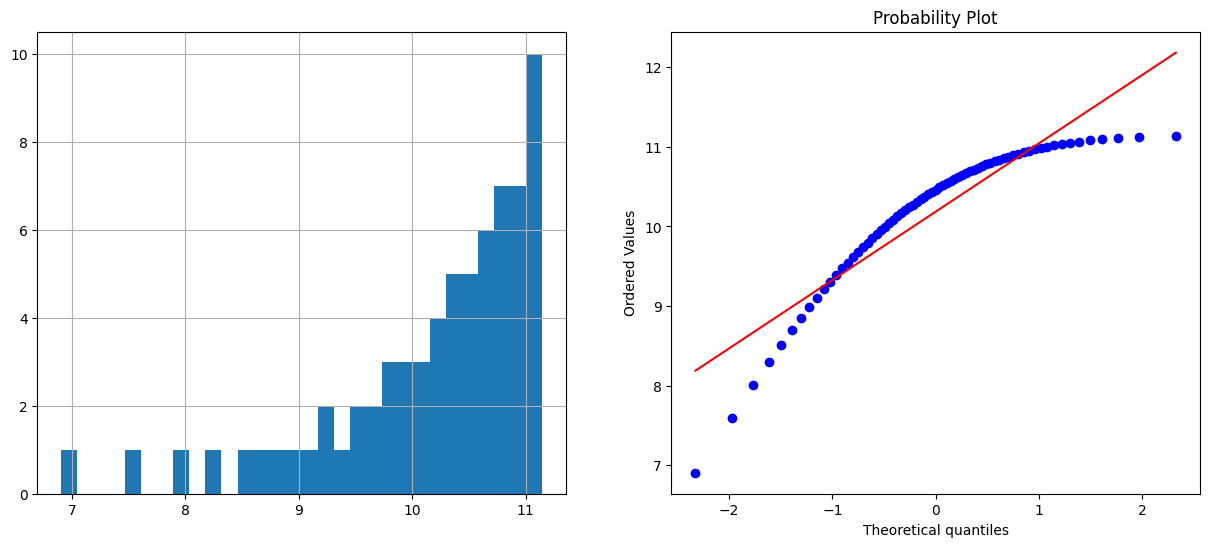

In [63]:
df2['vote_count_log'] = np.log(df2['vote_count'])
diagnostic_plots(df2, 'vote_count_log')

1. Показывает, как распределены логарифмы значений переменной `vote_count_log`
2. Сравнивает распределение значений переменной с теоретически нормальным распределением